In [13]:
import random

In [14]:
# Load the list of possible words from the file
with open('Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the list of words for testing from the file
with open('Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [15]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [16]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # First, check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Then, check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [17]:
# Function to generate a random word from the list of possible words
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [18]:
# Bayesian algorithm for word selection
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [19]:
# Training phase
training_set_size = 1000  # Adjust as needed
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

for target_word in training_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")
    
    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            training_attempts.append(attempts)
            
            if attempts < 3:
                great_starting_word.append(the_word)
                # great_starting_word_attempts = attempts
            break

word #1: girly


attempt: 4
word #2: sushi
attempt: 3
word #3: sonic
attempt: 6
word #4: flake
attempt: 4
word #5: gooey
attempt: 5
word #6: pride
attempt: 5
word #7: humus
attempt: 5
word #8: creep
attempt: 3
word #9: sonic
attempt: 4
word #10: munch
attempt: 2
word #11: brain
attempt: 4
word #12: femme
attempt: 4
word #13: racer
attempt: 6
word #14: proxy
attempt: 3
word #15: judge
attempt: 5
word #16: store
attempt: 7
word #17: hater
attempt: 7
word #18: macro
attempt: 3
word #19: gruel
attempt: 4
word #20: mural
attempt: 3
word #21: shelf
attempt: 4
word #22: downy
attempt: 5
word #23: shawl
attempt: 5
word #24: tight
attempt: 4
word #25: outer
attempt: 3
word #26: clasp
attempt: 4
word #27: biddy
attempt: 4
word #28: fancy
attempt: 6
word #29: tasty
attempt: 8
word #30: pence
attempt: 5
word #31: slice
attempt: 3
word #32: knife
attempt: 3
word #33: fairy
attempt: 5
word #34: posse
attempt: 4
word #35: ditto
attempt: 3
word #36: angel
attempt: 3
word #37: burly
attempt: 4
word #38: snort
attempt: 

In [22]:
from collections import Counter

def load_letter_frequencies(csv_path):
    letter_frequencies = {}
    with open(csv_path, 'r') as csvfile:
        next(csvfile)
        for row in csvfile:
            letter, frequency = row.strip().split(',')
            letter_frequencies[letter.lower()] = float(frequency)
    return letter_frequencies

def evaluate_word(word, letter_frequencies, repeat_penalty=20):
    # Calculate the frequency of each letter in the given word
    word_frequencies = Counter(word.lower())
    
    # Calculate the score for the word based on letter frequencies
    score = 0
    for letter in word_frequencies:
        score += letter_frequencies[letter] * word_frequencies[letter]
        
        # Apply penalty for repeated letters
        if word_frequencies[letter] > 1:
            score -= repeat_penalty * (word_frequencies[letter] - 1) * letter_frequencies[letter]
    return score

english_letter_frequencies = load_letter_frequencies('Dataset/letter_frequency.csv')

scores = {word: evaluate_word(word, english_letter_frequencies) for word in great_starting_word}
best_word = max(scores, key=scores.get)

# Sort the words based on their scores in descending order
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Display the results
print("Word Scores (Descending Order):")
for word, score in sorted_words:
    print(f"{word}: {score}")

print("\nBest Word for the First Word in Wordle:")
print(sorted_words[0][0])

Word Scores (Descending Order):
stead: 40.505
stale: 40.276999999999994
lathe: 40.044
tried: 38.964
adore: 38.616
chose: 35.412
fetid: 35.205
snipe: 34.673
ascot: 33.839
glean: 33.658
realm: 33.287
decor: 33.231
stank: 32.071
halve: 31.966
straw: 31.897
thank: 31.837999999999997
argue: 31.628999999999998
hasty: 31.618
caper: 31.567
drove: 31.427
torch: 31.426
piano: 31.317999999999998
mason: 31.155999999999995
voice: 30.935000000000002
boney: 30.423999999999996
price: 30.366
wield: 30.305999999999997
grope: 30.14
heavy: 29.915000000000003
grief: 29.898000000000003
plied: 29.875
bench: 29.819
prove: 29.103
nomad: 29.082
devil: 28.924
coral: 28.467999999999996
decry: 27.697999999999997
dairy: 27.346999999999998
lingo: 27.262
shady: 26.815
wagon: 26.798
topaz: 26.733
panic: 26.593
wight: 26.491
sword: 26.433999999999997
basic: 25.733999999999998
march: 25.436000000000003
crown: 25.384999999999998
aptly: 25.151
frown: 24.831
valid: 24.389
truly: 23.8
quash: 23.441000000000003
crawl: 23.320

In [23]:
# Testing phase
testing_attempts = []
word = 0
the_word = None

best_starting_word = []
best_starting_word_attempts = float('inf')

for target_word in testing_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")

    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            guess = best_word
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            testing_attempts.append(attempts)
            if attempts < 3:
                best_starting_word.append(the_word)
                # best_starting_word_attempts = attempts
            break

word #1: noise
attempt: 4
word #2: bleak
attempt: 4
word #3: grail
attempt: 4
word #4: phony
attempt: 4
word #5: mason
attempt: 4
word #6: noble
attempt: 3
word #7: pique
attempt: 4
word #8: retry
attempt: 6
word #9: cause
attempt: 3
word #10: tempo
attempt: 5
word #11: given
attempt: 3
word #12: smirk
attempt: 3
word #13: occur
attempt: 3
word #14: splat
attempt: 3
word #15: mercy
attempt: 4
word #16: adult
attempt: 4
word #17: graph
attempt: 4
word #18: leaky
attempt: 3
word #19: agent
attempt: 3
word #20: uncle
attempt: 4
word #21: knelt
attempt: 4
word #22: skunk
attempt: 3
word #23: snail
attempt: 4
word #24: truth
attempt: 4
word #25: binge
attempt: 3
word #26: viola
attempt: 5
word #27: chime
attempt: 3
word #28: bunch
attempt: 4
word #29: spurt
attempt: 3
word #30: while
attempt: 5
word #31: merry
attempt: 4
word #32: beret
attempt: 4
word #33: daddy
attempt: 4
word #34: azure
attempt: 4
word #35: coach
attempt: 6
word #36: smile
attempt: 3
word #37: loyal
attempt: 5
word #38: 

In [24]:
# Print average attempts for training and testing
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {avg_testing_attempts:.2f}")

Average attempts during training: 4.04
Average attempts during testing: 3.98


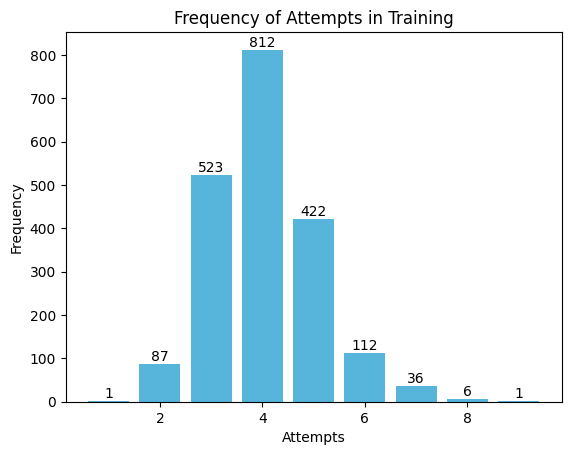

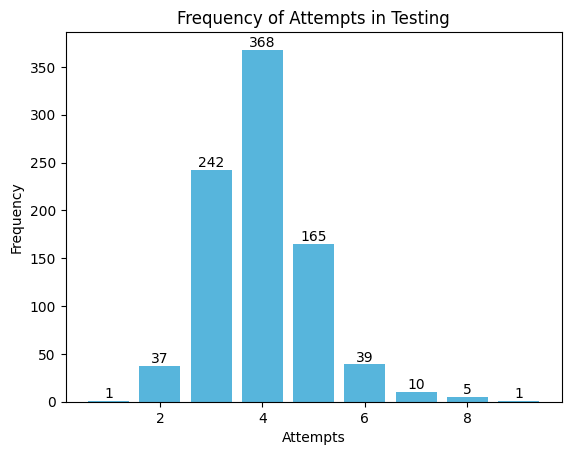

In [25]:
import matplotlib.pyplot as plt

unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

# Create a bar graph
plt.bar(unique_elements, counts, color='#57b5dc')

# Add data labels
for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

# Show the plot
plt.show()

unique_elements, counts = [], []

for item in set(testing_attempts):
    unique_elements.append(item)
    counts.append(testing_attempts.count(item))

# Create a bar graph
plt.bar(unique_elements, counts, color='#57b5dc')

# Add data labels
for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Testing')

# Show the plot
plt.show()

In [26]:
# Main game loop
attempts = 0
previous_guesses = []

print("Let's Play Wordle!")
print("Please think of a word and provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = best_word
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Let's Play Wordle!
Please think of a word and provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
⬛⬛⬛🟨⬛
⬛⬛🟩🟩🟩
🟩🟩🟩🟩🟩
Congratulations! The word was 'piano'. It took 3 attempts to guess.
